In [ ]:
#repeat pancake lens ghost slides

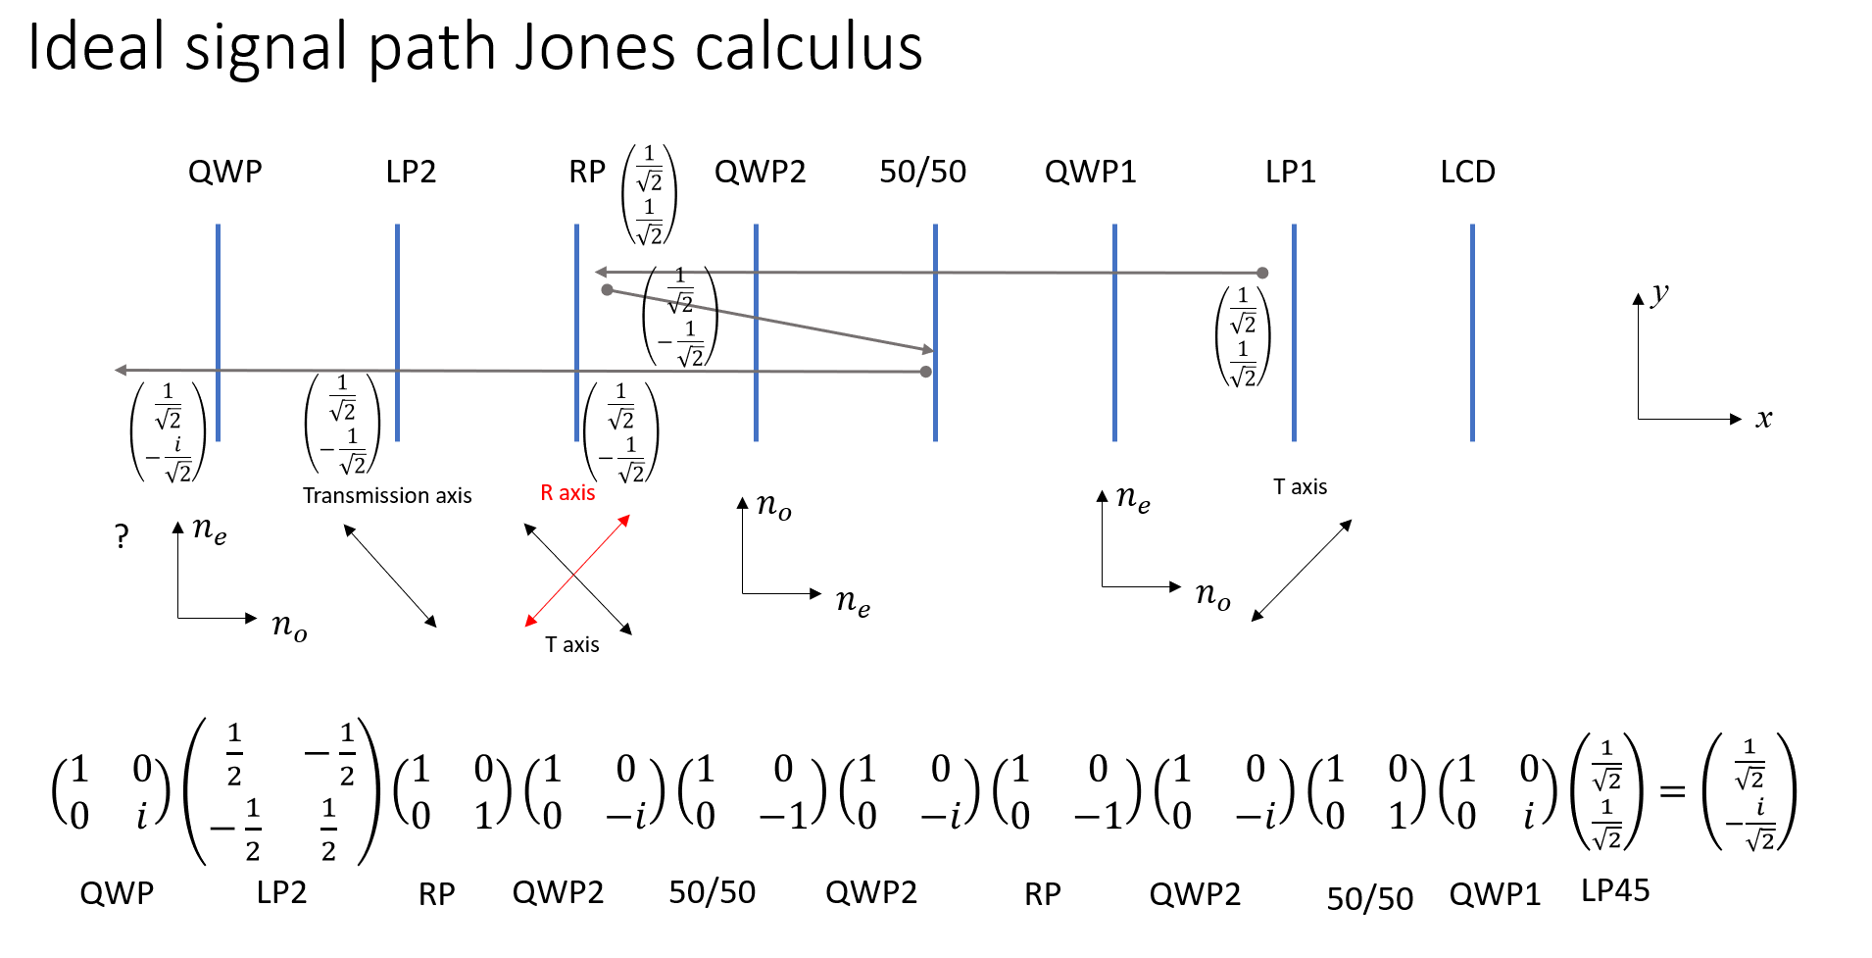

In [164]:
from IPython.display import Image, display

# Specify the path to your local image file
image_path = '/Users/qingjunwang/Documents/screenshots/pancakelens.png'
# Display the image
display(Image(filename=image_path))

In [3]:
import numpy as np

pancake lens components:

display
LP1_45deg
QWP1_nx_n0_ny_ne
T50;R50
QWP1_nx_ne_ny_n0
RP_r45deg_t135deg
LP2_135deg
QWP1_nx_n0_ny_ne


In [ ]:
#pancake lens components jones matrix list

In [143]:
#display

inputs=np.array([1/np.sqrt(2),1/np.sqrt(2)])
LP1_45deg=np.array(1/2*np.array([[1,1],[1,1]]))
QWP1_nx_n0_ny_ne=np.array([[1,0],[0,1j]])

t_50_50=np.array(1/2*np.array([[1,0],[0,1]]));

r_50_50=np.array([[1,0],[0,-1]])
# reflection add 180 deg phase into Ex and Ey [[-1,0],[0,-1]], and since the direction change, and assume you always look towards the light, then the direction of Ex will flip
# and become [[1,0],[0,-1]]

QWP2_nx_ne_ny_n0=np.array([[1j,0],[0,1]]) #???? why select this version?
#QWP2_nx_ne_ny_n0=np.array([[1,0],[0,-1j]]) #???? why select this version? 
#it's ok if you only care about the relative phase between Ex and Ey

#RP jones matrix
#method1
RP_r=np.array([[1,0],[0,-1]])@np.array(1/2*np.array([[1,1],[1,1]]))
RP_t=np.array([[1,0],[0,1]])@np.array(1/2*np.array([[1,-1],[-1,1]]))
#method2
# RP_r=np.array([[1,0],[0,-1]])
# RP_t=np.array([[1,0],[0,1]])
#method1 and method2 are equal
#RP needed to divide into two cases in jones matrix: one polarizer and reflection, another polarizer and transmission; 

LP2_135deg=np.array(1/2*np.array([[1,-1],[-1,1]]))

In [51]:
# how to represent mirror 
# and propogation direction reserse?

# Signal path calculation

In [144]:
#signal path calculation
output=(QWP1_nx_n0_ny_ne@LP2_135deg@RP_t@QWP2_nx_ne_ny_n0@r_50_50@QWP2_nx_ne_ny_n0@RP_r@QWP2_nx_ne_ny_n0@t_50_50@QWP1_nx_n0_ny_ne@LP1_45deg@inputs)
print(output/np.abs(output))

[ 0.-1.j -1.+0.j]


### conclusion: match result in example, matrix all right

### experiment: flip the reserve direction LP and QWP

In [163]:
#signal path calculation
output=(QWP1_nx_n0_ny_ne@LP2_135deg@RP_t@QWP1_nx_n0_ny_ne@r_50_50@QWP1_nx_n0_ny_ne@RP_r@QWP2_nx_ne_ny_n0@t_50_50@QWP1_nx_n0_ny_ne@LP1_45deg@inputs)
print(output)

[0.        +0.35355339j 0.35355339+0.j        ]


### conclusion: indeed, the reserve propogation QWP and LP need to flip in x direction

# QWP2-t-QWP1 subsystem study

In [145]:
QWP2_t_QWP1=QWP2_nx_ne_ny_n0@t_50_50@QWP1_nx_n0_ny_ne
print(QWP2_t_QWP1)
magnitude = np.abs(QWP2_t_QWP1)
# normalized_QWP2_t_QWP1 = np.where(magnitude>1e-6, QWP2_t_QWP1 / magnitude, 0)
# print(normalized_QWP2_t_QWP1)

[[0.+0.5j 0.+0.j ]
 [0.+0.j  0.+0.5j]]


### conclusion: QWP2-t-QWP1 equal to identity matrix

# QWP2-reflection-QWP2 subsystem study

In [146]:
original=RP_r@QWP2_nx_ne_ny_n0@t_50_50@QWP1_nx_n0_ny_ne@LP1_45deg@inputs
print(original) 

[0.+0.35355339j 0.-0.35355339j]


In [115]:
# when propogate direction flip, need to flip the Ex to consider the polarization

### original: 45degree polarization, propogate to right

In [147]:
QWP2_ref_QWP2=QWP2_nx_ne_ny_n0@r_50_50@QWP2_nx_ne_ny_n0@original
print(QWP2_ref_QWP2)

[0.-0.35355339j 0.+0.35355339j]


### output: 135degree polarization, propogate to left

### conclusion: QWP2-reflection-QWP2 will rotate original polarization to orthoganal direction

# Ghost path #?

In [153]:
RP_r@QWP2_nx_ne_ny_n0@t_50_50@QWP1_nx_n0_ny_ne@LP1_45deg@inputs

array([0.+0.35355339j, 0.-0.35355339j])

In [149]:
inputs=np.array([1/np.sqrt(2),1/np.sqrt(2)])
ghost_n=(QWP1_nx_n0_ny_ne@t_50_50@QWP2_nx_ne_ny_n0@np.array([0.+0.35355339j, 0.-0.35355339j]))
ghost_final=LP1_45deg@ghost_n
print(ghost_final,ghost_n)

[0.+0.j 0.+0.j] [-0.1767767+0.j  0.1767767+0.j]


In [162]:
np.array(1/2*np.array([[1,-1],[-1,1]]))@QWP2_nx_ne_ny_n0@t_50_50@QWP1_nx_n0_ny_ne@ RP_r@QWP2_nx_ne_ny_n0@t_50_50@QWP1_nx_n0_ny_ne@LP1_45deg@inputs

array([-0.1767767+0.j,  0.1767767+0.j])

### conclusion: 45degree polarization propagating to right

# Q: follow up question: why there is a QWP at the end of the path